In [1]:
import sys
print sys.path
sys.path.append('../')
sys.path.append("/Users/naylorpeter/Documents/Python/PhD_Fabien/FCN_Segmentation/")

['', '/Users/naylorpeter/.pythonlinks', '/Users/naylorpeter/Documents/Python/PhD_Fabien/AssociatedNotebooks', '/Users/naylorpeter/anaconda/lib/python27.zip', '/Users/naylorpeter/anaconda/lib/python2.7', '/Users/naylorpeter/anaconda/lib/python2.7/plat-darwin', '/Users/naylorpeter/anaconda/lib/python2.7/plat-mac', '/Users/naylorpeter/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/naylorpeter/anaconda/lib/python2.7/lib-tk', '/Users/naylorpeter/anaconda/lib/python2.7/lib-old', '/Users/naylorpeter/anaconda/lib/python2.7/lib-dynload', '/Users/naylorpeter/.local/lib/python2.7/site-packages', '/usr/local/lib/python2.7/site-packages', '/usr/local/Cellar/numpy/1.11.0/libexec/nose/lib/python2.7/site-packages', '/Users/naylorpeter/anaconda/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg', '/Users/naylorpeter/anaconda/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg', '/Users/naylorpeter/anaconda/lib/python2.7/site-packages', '/Users/naylorpeter/anaconda/lib/python2.7/site-pac

In [2]:
import UsefulFunctions.ImageTransf as Transf
import UsefulFunctions.Datamanager as dm

In [17]:
%matplotlib inline
import matplotlib.pylab as plt
### Useful plotting function
def plot_comparison(original, modified, third, modification):

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,16))
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax2.imshow(modified, cmap=plt.cm.gray)
    ax2.set_title(modification)
    ax3.imshow(third, cmap=plt.cm.gray)
    ax3.set_title("weight")

In [7]:
#path = '/home/naylor/Bureau/ToAnnotate'
path = '/Users/naylorpeter/Documents/Histopathologie/ToAnnotate/'

test = dm.DataManager(path)
test.prepare_sets()

transform_list = [Transf.Rotation("rot45",45),Transf.ElasticDeformation("ElasTransf",0,30,4)]
test.SetTransformation(transform_list)
for img, img_gt in test.TrainingIterator(fold = 1):
    plot_comparison(img, img_gt, "gt")

AttributeError: 'DataManager' object has no attribute 'TrainingIterator'

In [4]:
from DataGen import DataGen
path = '/Users/naylorpeter/Documents/Histopathologie/ToAnnotate/'
enlarge = True
transform_list = [Transf.Identity(),
                      Transf.Flip(0),
                      Transf.Flip(1)]

for rot in range(1, 360):
    transform_list.append(Transf.Rotation(rot, enlarge=enlarge))

for sig in [1, 2, 3, 4]:
    transform_list.append(Transf.OutOfFocus(sig))

for i in range(20):
    transform_list.append(Transf.ElasticDeformation(0, 10, num_points=9))

data_generator = DataGen(path, crop=4, size=(224,224),
                                   transforms=transform_list, split="train",
                                   leave_out=1, seed=42,
                                   img_format="RGB", Weight =True, Unet=True)

step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222
step:  256 256
I set the seed here, DataGen:l:222


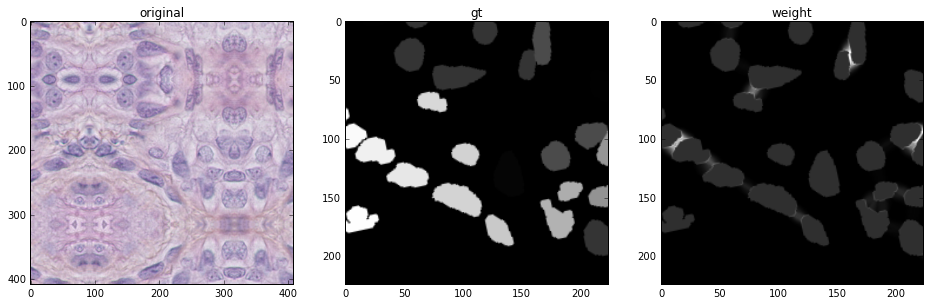

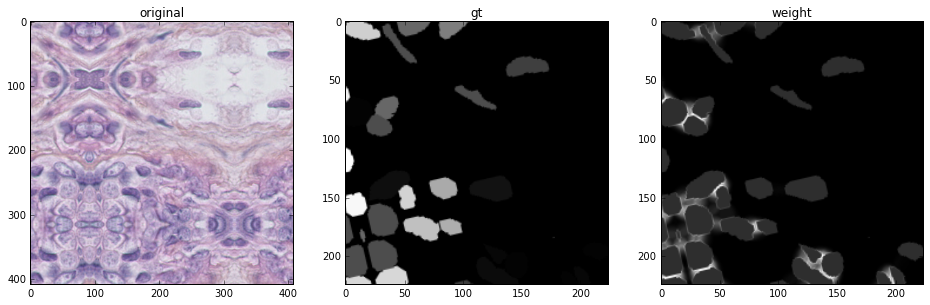

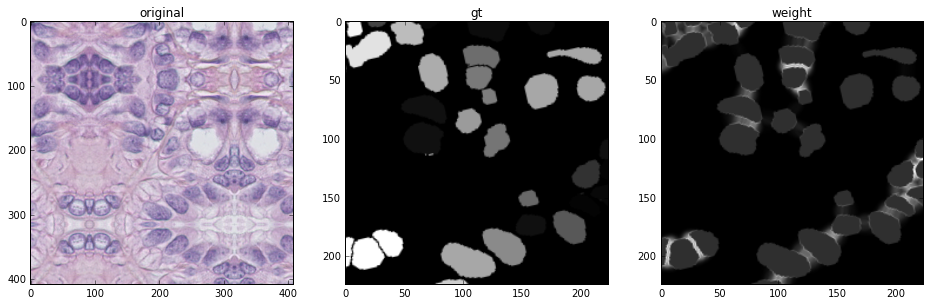

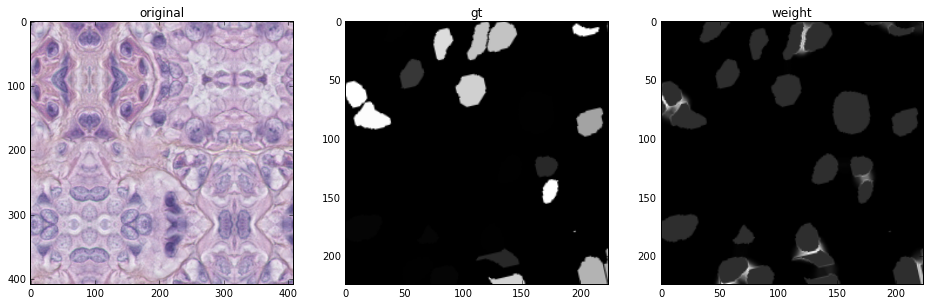

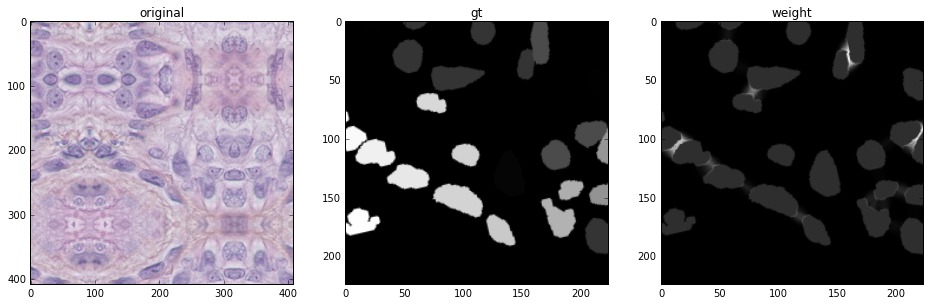

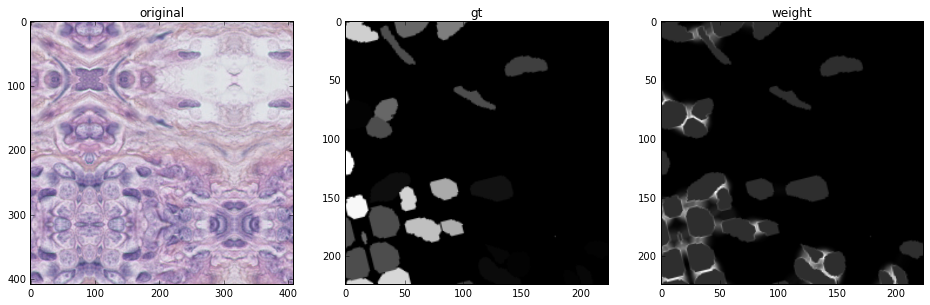

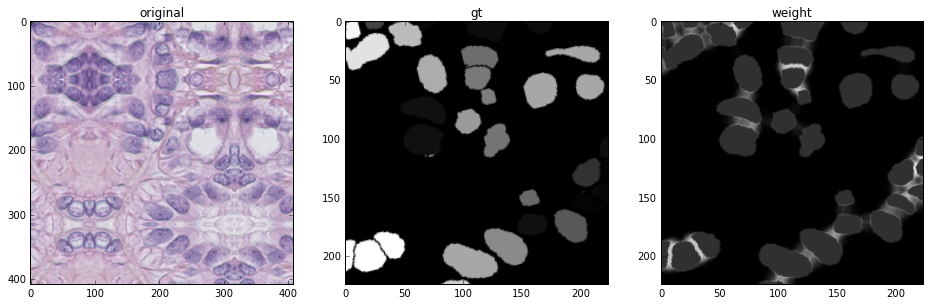

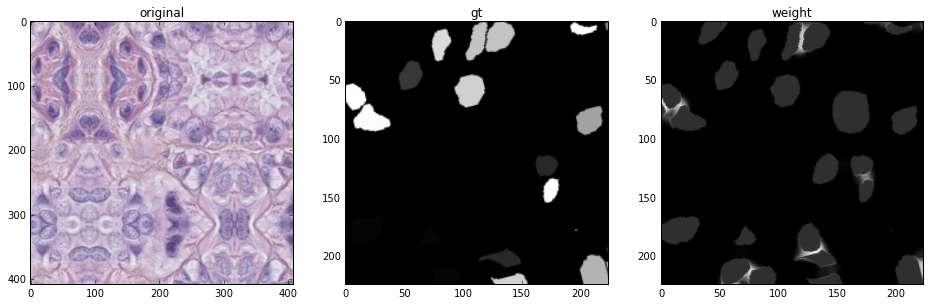

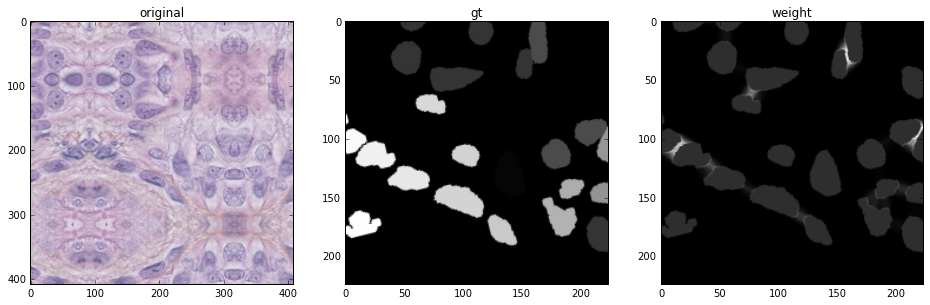

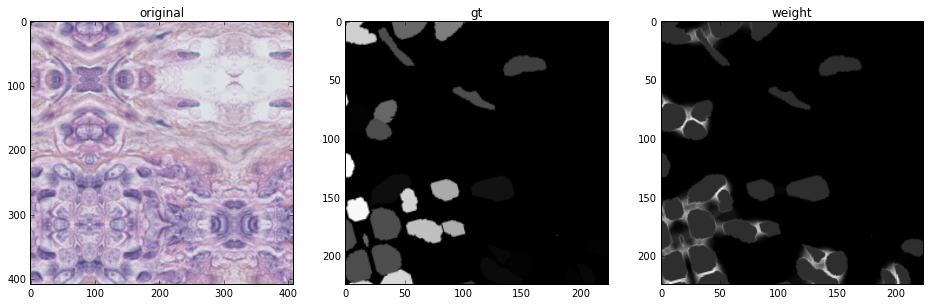

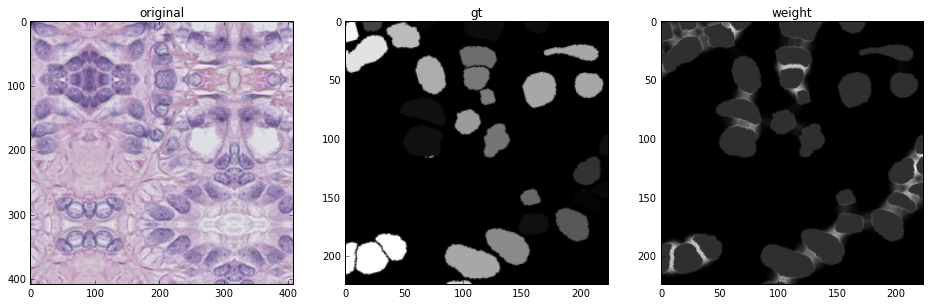

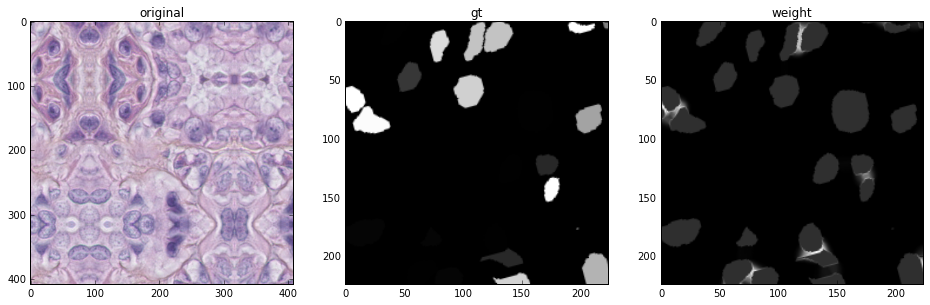

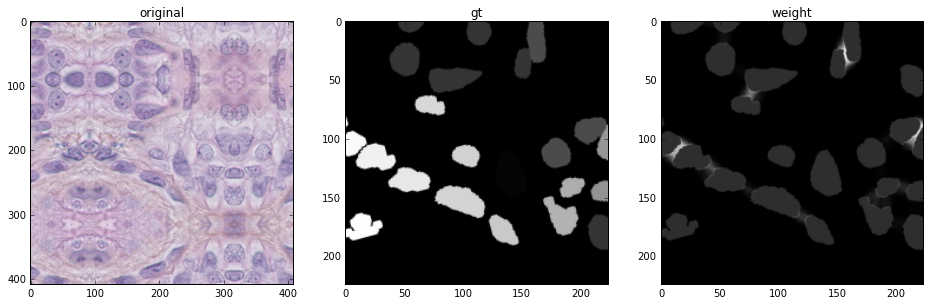

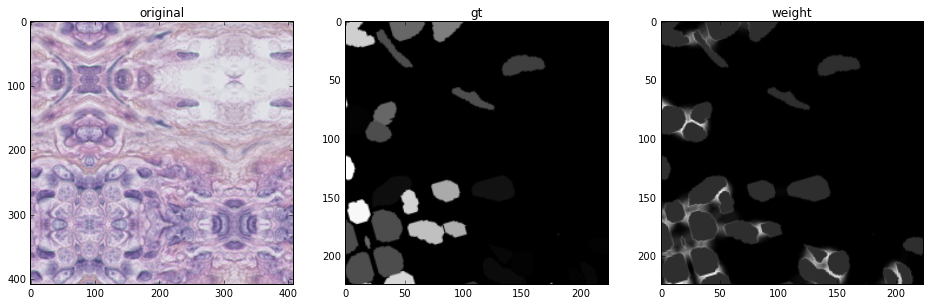

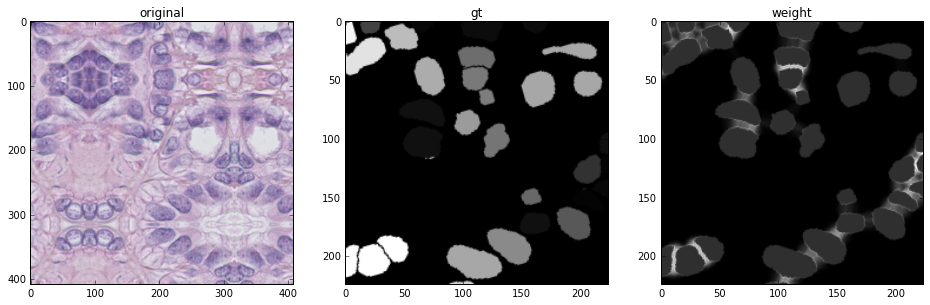

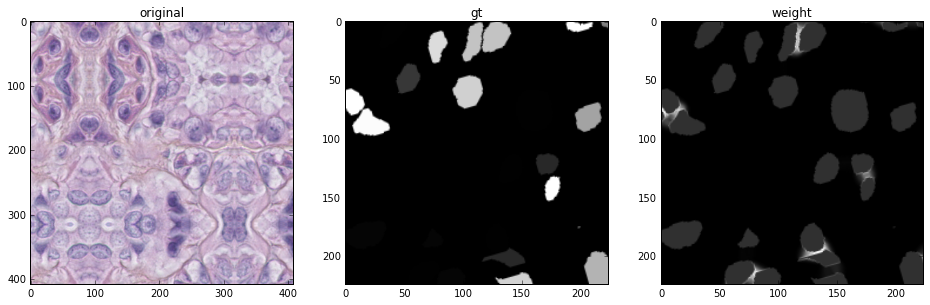

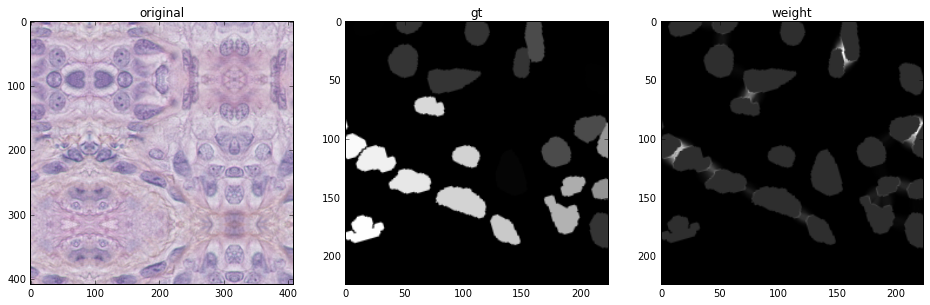

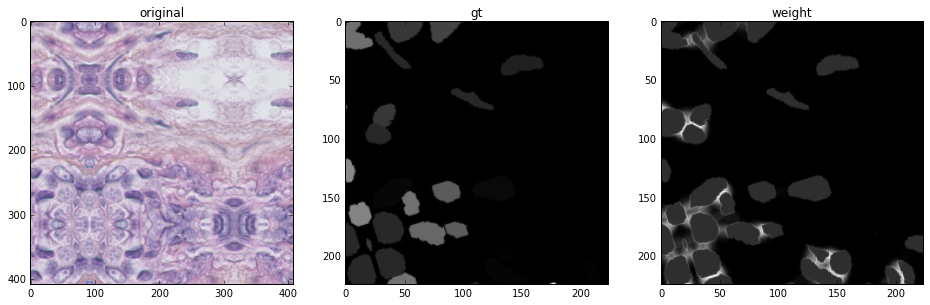

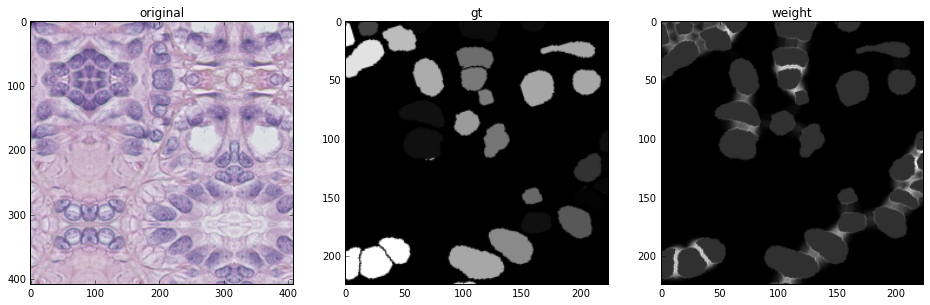

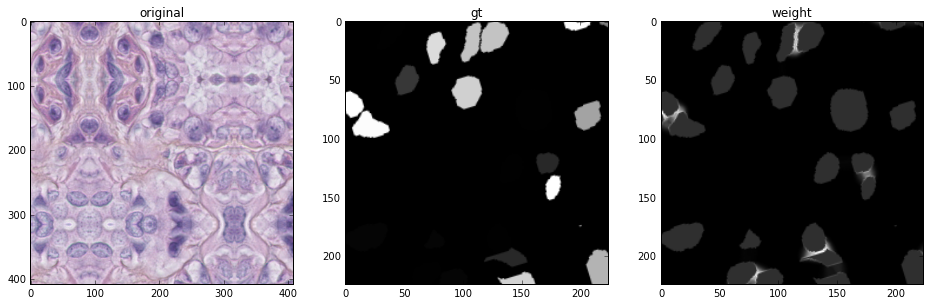

In [20]:
import numpy as np
key = data_generator.RandomKey(True)
for i in range(20):
    key = data_generator.NextKey(key)
    img, lbl, wgt = data_generator[key]
    if 0 in wgt:
        print np.unique(wgt, return_counts=True)
    n = 92
    plot_comparison(img.astype(np.uint8), lbl[:,:,0], wgt[:,:,0],"gt")

In [7]:
img.dtype

dtype('float64')